Автор: Лейман М.А.   
Дата создания: 22.03.2025  

# Задание ZALA  
## 4. Детектирование множества объектов
### Модель __YOLOv8n__ (Ultralytics YOLOv8 Nano).

## Импорты

In [1]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





import warnings
warnings.filterwarnings("ignore")


print('Виртуальное окружение')
!which python 
# Текущее положение
print('\nТекущее положение: ')
path_1 = os.getcwd()
print(path_1)

Виртуальное окружение
/home/maksim/anaconda3/envs/rapids-25.02/bin/python

Текущее положение: 
/home/maksim/develops/python/devsTraining/zala_task


In [2]:

import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random


import torch

from PIL import Image






#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

## Проверка GPU

In [3]:
# устанавливаем device если gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.6.0+cu124
версия  cuDNN:           90100
Sat Mar 29 18:41:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:01:00.0  On |                  N/A |
|  0%   43C    P5             23W /  170W |     908MiB /  12288MiB |     23%      Default |
|                                         

In [4]:
# Получаем текущую директорию
path_dir = os.getcwd()
print("Текущая директория:", path_dir)

DATA_DIR = os.path.abspath(os.path.join(path_dir, 'dataset'))
print("Путь к dataset:", DATA_DIR)



Текущая директория: /home/maksim/develops/python/devsTraining/zala_task
Путь к dataset: /home/maksim/develops/python/devsTraining/zala_task/dataset


## Обучение

### Yolo

In [5]:
import time
from glob import glob
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
from IPython.display import clear_output
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
import pandas as pd
from torch.optim import lr_scheduler
from torch import Tensor
import torch.nn as nn
#from tqdm.autonotebook import tqdm
from tqdm import tqdm_notebook
import torch.nn.functional as F
from torchvision import models
import copy
import torch.optim as optim
import time
from torchsummary import summary  # для вывода информации о модели
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from matplotlib import rcParams
from skimage import img_as_ubyte
import random

#from tqdm.notebook import tqdm
from tqdm import tqdm

from torch.utils.data.sampler import SubsetRandomSampler  
from torchsummary import summary


from PIL import Image
import imageio

sns.set_style('darkgrid')

warnings.filterwarnings("ignore")
# np.random.seed(42)
#set_global_seed(42)
rcParams['figure.figsize'] = (14,6)

In [7]:
from ultralytics import YOLO

# model = YOLO("models/yolo11n.pt")  # Загружаем предобученную модель
model = YOLO("models/11n_best.pt")

In [ ]:
# # ['auto', 'Adam', 'SGD', 'AdamW', 'Adamax', 'NAdam', 'RAdam']
# for opt in ['NAdam', 'Adam', 'SGD', 'AdamW', 'Adamax', 'RAdam']:
#     for batch in [12, 4, 28]:
#         for mosaic in [0, 0.5]:
#             for lr00 in [0.01, 0.001, 0.0001]:
#                 for iou0 in [0.2, 0.7, 0.5]:
#                     model.train(
#                         data="data.yaml",
#                         epochs=10,
#                         imgsz=512,
#                         batch=batch,
#                         device="cuda",
#                         lr0=lr00,  # Начальная скорость обучения (обычно 0.01)
#                         lrf=0.1,  # Финальная скорость обучения (0.1 по умолчанию)
#                         momentum=0.951,  # Моментум SGD (по умолчанию)
#                         weight_decay=0.001,  # Регуляризация (меньше - больше обобщающая способность)
#                         optimizer=opt,
#                         cache=True,
#                         mosaic=mosaic,
#                         single_cls=False,
#                         patience=20,
#                         verbose=False,
#                         freeze=1,
#                         iou=0.5,
#                     )


In [8]:
import os
import time
from IPython.display import clear_output 
for lr00 in [0.0005, 0.0001, 0.00005]:
    for opt in ['AdamW']:
        for batch in [16]:
            for mosaic in [0]:
                for iou0 in [0.5]:
                    # Очистка экрана перед каждой новой тренировкой
                    os.system('cls' if os.name == 'nt' else 'clear')  # Для терминала
                    clear_output(wait=True)  # Для Jupyter Notebook 

                    print(f"Запуск тренировки: opt={opt}, batch={batch}, mosaic={mosaic}, lr0={lr00}, iou={iou0}")
                    
                    model.train(
                        data="data.yaml",
                        epochs=50,
                        imgsz=512,
                        batch=batch,
                        device="cuda",
                        lr0=lr00,
                        lrf=0.1,
                        momentum=0.951,
                        weight_decay=0.0001,
                        optimizer=opt,
                        cache=True,
                        mosaic=mosaic,
                        single_cls=False,
                        patience=20,
                        verbose=False,
                        freeze=1,
                        iou=iou0,  # Исправлено: iou0 передаётся в параметр iou
                    )

                    time.sleep(0.5)  # Небольшая задержка, чтобы увидеть обновление


Запуск тренировки: opt=AdamW, batch=16, mosaic=0, lr0=5e-05, iou=0.5
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
engine/trainer: task=detect, mode=train, model=models/11n_best.pt, data=data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=512, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=1, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

train: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/train.cache... 4720 images, 328 backgrounds, 0 corrupt: 100%|██████████| 4720/4720 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/images/train/41_aug5.jpg: 1 duplicate labels removed


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.9GB RAM): 100%|██████████| 4720/4720 [00:17<00:00, 262.68it/s]
val: Scanning /home/maksim/develops/python/devsTraining/zala_task/dataset/5_dataset_full/labels/val.cache... 169 images, 9 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 169/169 [00:00<00:00, 265.70it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: AdamW(lr=5e-05, momentum=0.951) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0001), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.82G      1.098     0.5816     0.8638        194        512: 100%|██████████| 295/295 [00:26<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.82it/s]

                   all        169       3814      0.489       0.35      0.351       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.63G      1.014     0.5321     0.8496        186        512: 100%|██████████| 295/295 [00:25<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]

                   all        169       3814      0.671      0.388      0.399      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.64G     0.9877     0.5171     0.8437        672        512: 100%|██████████| 295/295 [00:25<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.86it/s]

                   all        169       3814      0.571      0.417       0.42      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.64G     0.9613     0.5073     0.8406        411        512: 100%|██████████| 295/295 [00:24<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all        169       3814      0.595      0.415       0.43      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.64G     0.9582     0.5053     0.8393        375        512: 100%|██████████| 295/295 [00:24<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]

                   all        169       3814      0.607      0.413      0.416       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.64G     0.9647     0.5052     0.8401        232        512: 100%|██████████| 295/295 [00:25<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all        169       3814       0.64      0.395      0.419      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.64G     0.9583     0.5034     0.8402        266        512: 100%|██████████| 295/295 [00:25<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.03it/s]

                   all        169       3814      0.583       0.41      0.419      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.64G     0.9584     0.5034     0.8403        171        512: 100%|██████████| 295/295 [00:24<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]

                   all        169       3814      0.544      0.428       0.42      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.64G     0.9546     0.5016     0.8397        364        512: 100%|██████████| 295/295 [00:24<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]

                   all        169       3814      0.591      0.417      0.425      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.64G     0.9511     0.5015      0.839        453        512: 100%|██████████| 295/295 [00:24<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all        169       3814      0.599      0.408      0.424      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.64G     0.9601     0.5057     0.8403        303        512: 100%|██████████| 295/295 [00:24<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all        169       3814      0.607       0.41      0.422      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.64G     0.9513     0.5007     0.8407        232        512: 100%|██████████| 295/295 [00:24<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]

                   all        169       3814      0.579      0.414      0.423      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.64G     0.9522     0.5016     0.8391        188        512: 100%|██████████| 295/295 [00:24<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]

                   all        169       3814      0.581      0.416      0.421       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.64G     0.9529     0.5022     0.8394        245        512: 100%|██████████| 295/295 [00:24<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]

                   all        169       3814      0.615      0.402      0.422      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.66G     0.9538        0.5     0.8394        270        512: 100%|██████████| 295/295 [00:24<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all        169       3814       0.61      0.415       0.42      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.67G     0.9585     0.5018     0.8399        241        512: 100%|██████████| 295/295 [00:25<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]

                   all        169       3814      0.588      0.424      0.423      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.67G     0.9546     0.5011     0.8384        173        512: 100%|██████████| 295/295 [00:24<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]

                   all        169       3814      0.612      0.405      0.419      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.67G      0.952     0.5017     0.8399        179        512: 100%|██████████| 295/295 [00:24<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]

                   all        169       3814      0.601      0.411      0.424      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.67G     0.9563     0.5034     0.8393        249        512: 100%|██████████| 295/295 [00:24<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]

                   all        169       3814      0.607      0.414      0.423      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.67G     0.9517     0.5016     0.8396        319        512: 100%|██████████| 295/295 [00:25<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]

                   all        169       3814      0.604      0.408      0.423      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.67G     0.9511     0.4993     0.8378        226        512: 100%|██████████| 295/295 [00:24<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.94it/s]

                   all        169       3814      0.606      0.408       0.42      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.67G     0.9541     0.5019      0.839        319        512: 100%|██████████| 295/295 [00:24<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]

                   all        169       3814      0.606      0.409       0.42      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.67G     0.9486     0.4994      0.839        239        512: 100%|██████████| 295/295 [00:24<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]

                   all        169       3814      0.615      0.412      0.425      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.67G     0.9481     0.4995     0.8391        486        512: 100%|██████████| 295/295 [00:24<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.04it/s]

                   all        169       3814      0.635      0.404      0.421      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.67G     0.9538     0.5025     0.8395        194        512: 100%|██████████| 295/295 [00:24<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.96it/s]

                   all        169       3814      0.608      0.407      0.417      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.67G     0.9516     0.4992     0.8393        307        512: 100%|██████████| 295/295 [00:24<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.77it/s]

                   all        169       3814      0.599      0.409      0.423      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.67G     0.9535     0.5022     0.8404        515        512: 100%|██████████| 295/295 [00:25<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.85it/s]

                   all        169       3814      0.598      0.419      0.427      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.67G     0.9557     0.5004     0.8406        254        512: 100%|██████████| 295/295 [00:25<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all        169       3814      0.613      0.412      0.424      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.67G     0.9653     0.5053     0.8413        416        512: 100%|██████████| 295/295 [00:24<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        169       3814      0.604      0.414      0.425      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.67G     0.9585     0.5018     0.8399        258        512: 100%|██████████| 295/295 [00:24<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all        169       3814      0.596      0.416      0.423      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.67G     0.9629     0.5045     0.8413        178        512: 100%|██████████| 295/295 [00:24<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all        169       3814       0.58      0.414      0.419      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.67G     0.9584     0.5005     0.8408        396        512: 100%|██████████| 295/295 [00:24<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all        169       3814      0.598      0.415      0.423      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.67G     0.9613     0.5026     0.8399        286        512: 100%|██████████| 295/295 [00:24<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]


                   all        169       3814      0.598      0.418      0.423      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.67G     0.9666     0.5048     0.8417        196        512: 100%|██████████| 295/295 [00:25<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.91it/s]

                   all        169       3814       0.61      0.414       0.42      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.67G     0.9655     0.5052     0.8414        179        512: 100%|██████████| 295/295 [00:25<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.77it/s]

                   all        169       3814      0.617      0.406      0.419      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.67G     0.9584     0.5012     0.8402        283        512: 100%|██████████| 295/295 [00:25<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all        169       3814       0.65      0.402      0.419      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.67G     0.9598      0.503     0.8413        226        512: 100%|██████████| 295/295 [00:24<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]


                   all        169       3814      0.613       0.41      0.421      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.67G     0.9678     0.5058       0.84        225        512: 100%|██████████| 295/295 [00:25<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.57it/s]


                   all        169       3814      0.607       0.41      0.422      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.67G     0.9679     0.5067     0.8413        329        512: 100%|██████████| 295/295 [00:24<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all        169       3814      0.607      0.412      0.418      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.67G     0.9806     0.5102     0.8425        302        512: 100%|██████████| 295/295 [00:25<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]

                   all        169       3814      0.592      0.414      0.424      0.235


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.67G     0.9832     0.5125     0.8447        194        512: 100%|██████████| 295/295 [00:24<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]


                   all        169       3814      0.621      0.405      0.422      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.67G     0.9792     0.5083     0.8438        218        512: 100%|██████████| 295/295 [00:24<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.92it/s]

                   all        169       3814      0.616      0.411      0.427      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.67G     0.9821     0.5103     0.8439        291        512: 100%|██████████| 295/295 [00:25<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.72it/s]

                   all        169       3814      0.584      0.414      0.425      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.67G     0.9859     0.5111     0.8439        218        512: 100%|██████████| 295/295 [00:25<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.90it/s]

                   all        169       3814      0.607      0.402      0.423      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.67G     0.9789     0.5098     0.8443        452        512: 100%|██████████| 295/295 [00:24<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.88it/s]

                   all        169       3814      0.588      0.412       0.42      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.67G     0.9785     0.5115     0.8435        323        512: 100%|██████████| 295/295 [00:24<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]

                   all        169       3814      0.629      0.397      0.425      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.67G     0.9728      0.506     0.8438        288        512: 100%|██████████| 295/295 [00:24<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.90it/s]

                   all        169       3814        0.6      0.411      0.422      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.67G      0.983     0.5104     0.8443        199        512: 100%|██████████| 295/295 [00:24<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all        169       3814      0.588      0.415      0.422      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.67G     0.9788     0.5093     0.8447        212        512: 100%|██████████| 295/295 [00:24<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all        169       3814       0.62       0.41      0.423      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.67G     0.9786     0.5101     0.8431        202        512: 100%|██████████| 295/295 [00:25<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]

                   all        169       3814      0.591      0.415      0.423      0.235



50 epochs completed in 0.359 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 5.4MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]


                   all        169       3814      0.597      0.413      0.425      0.238
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train22


## Первая итерация обучения 

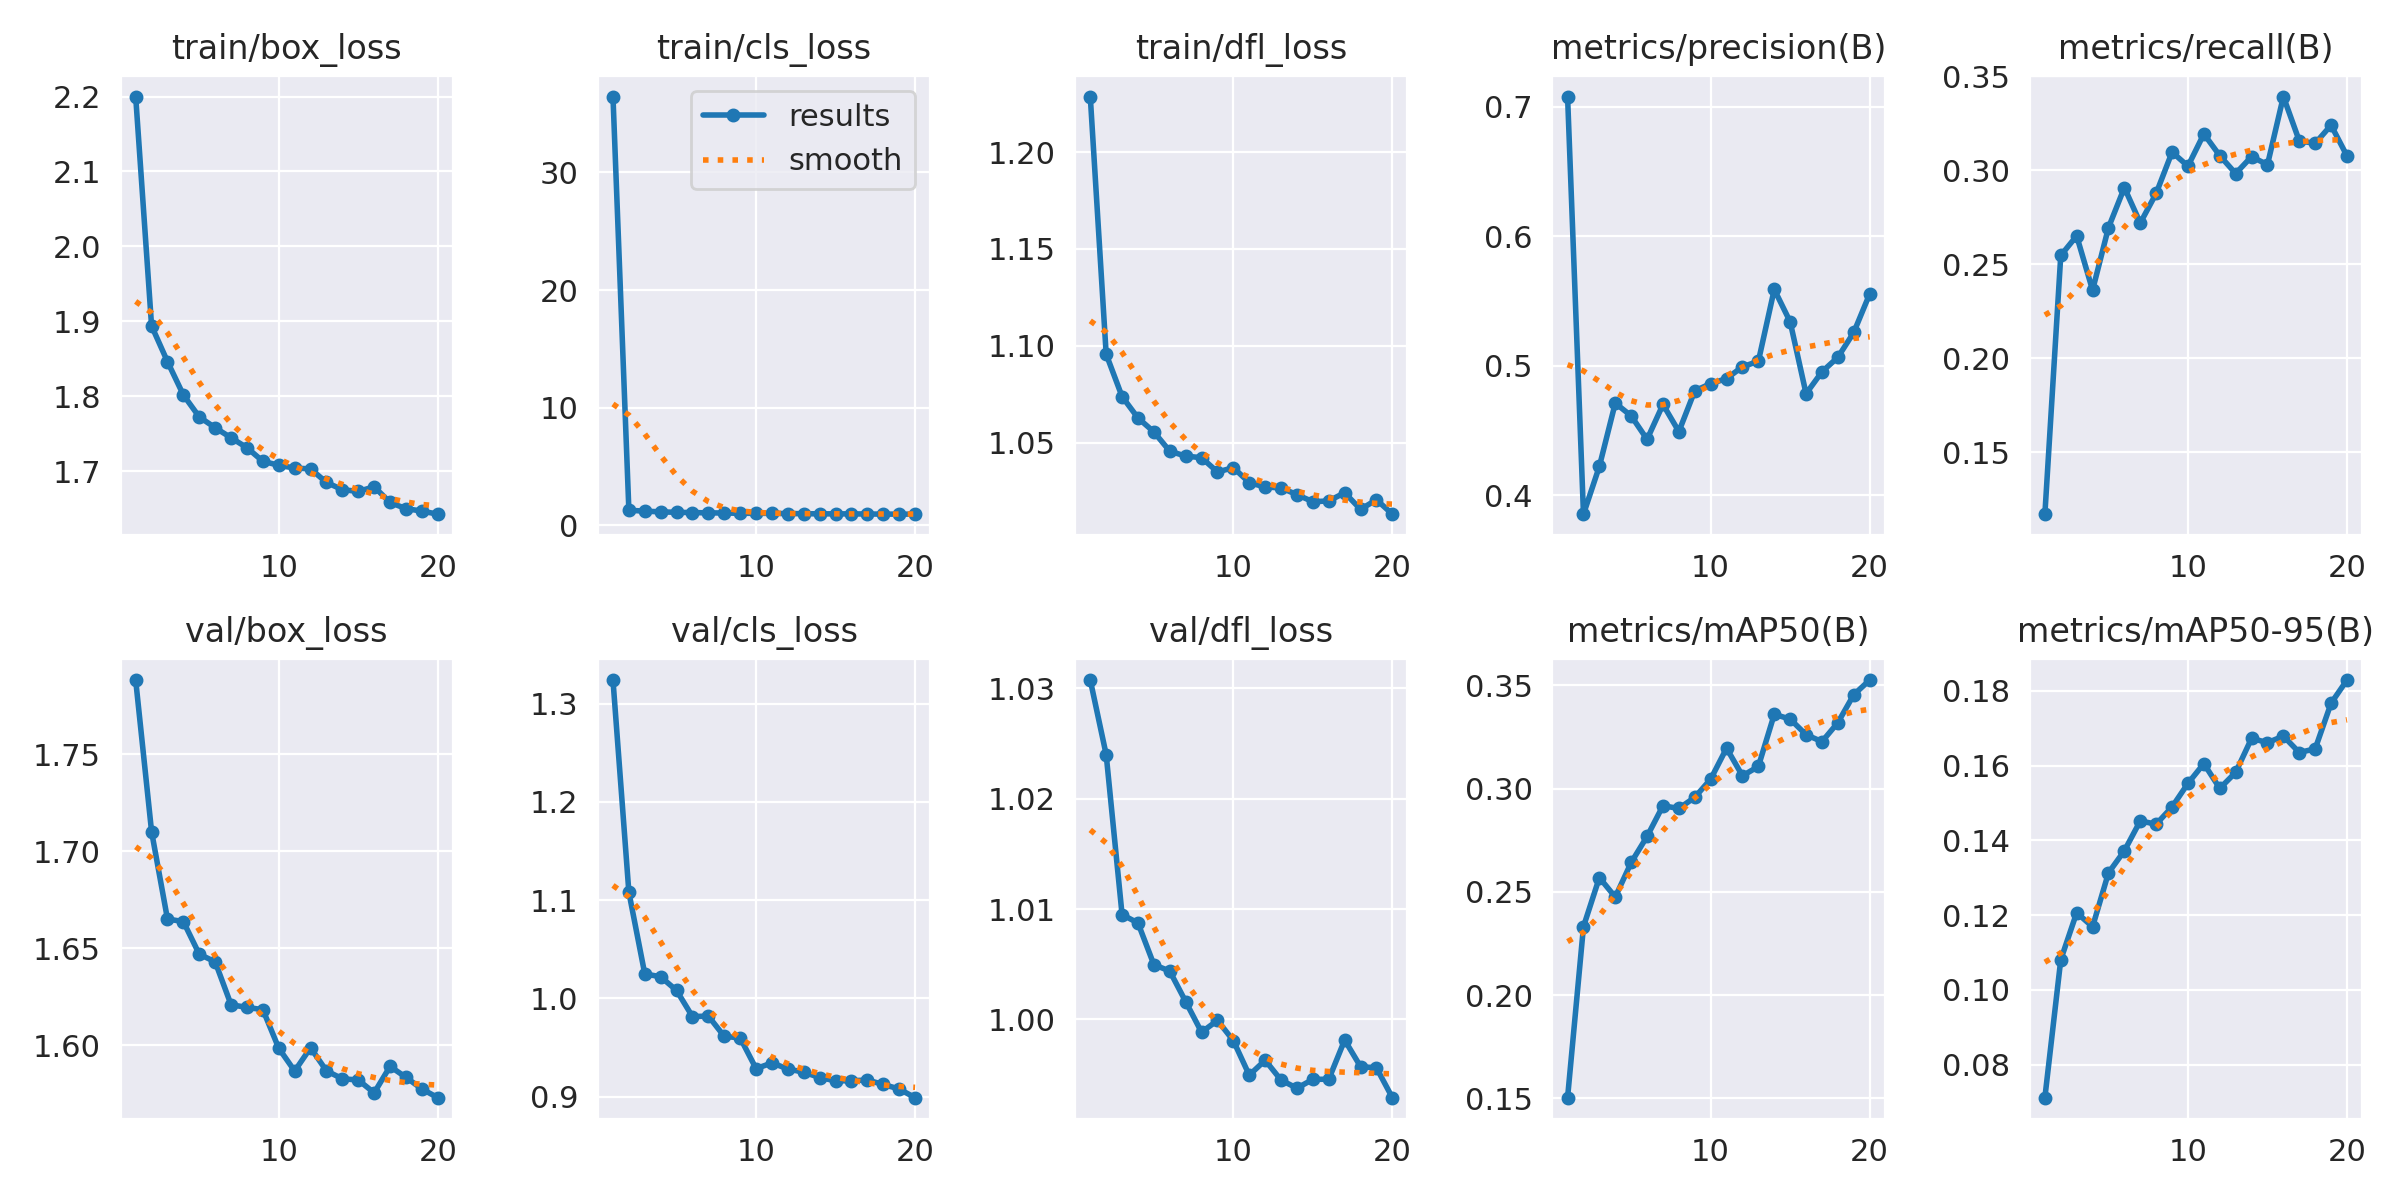

In [8]:
def metrics_model(model, split="test", iou=0.5):
    metrics = model.val(data="data.yaml", split=split, iou=iou)
    precision = metrics.box.p.mean().item()  # Precision
    recall = metrics.box.r.mean().item()  # Recall
    map50 = metrics.box.map50.mean().item()  # AP50 (IoU=0.5)
    map50_95 = metrics.box.maps.mean().item()  # mAP50-95

    # Выводим итоговые метрики
    print("\n=== Итоговые метрики по тестовому набору ===")
    print(f"Средняя точность (Precision): {precision:.3f}")
    print(f"Средняя полнота (Recall): {recall:.3f}")
    print(f"Средняя AP50 (IoU={iou:.2f}): {map50:.3f}")
    print(f"Средний mAP50-95: {map50_95:.3f}")

In [9]:
metrics_model(model, split="test", iou=0.5)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 14,430 gradients, 6.3 GFLOPs


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 85/85 [00:00<00:00, 297.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


                   all         85       1656      0.632      0.475      0.485      0.273
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train2222222222222222222223

=== Итоговые метрики по тестовому набору ===
Средняя точность (Precision): 0.632
Средняя полнота (Recall): 0.475
Средняя AP50 (IoU=0.50): 0.485
Средний mAP50-95: 0.273


In [5]:
metrics_model(model, split="test", iou=0.4)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]


                   all         85       1656      0.673      0.442      0.428      0.257
              building         59       1080      0.753       0.78      0.767      0.425
 cultivation-mesh-cage         11         57      0.682      0.842      0.708      0.483
             landslide          3          5     0.0613        0.2     0.0499     0.0349
                  pool          7         10      0.885        0.5      0.536      0.387
   prefabricated-house         50        298      0.886      0.638      0.753       0.42
                quarry          7          8      0.826      0.599      0.545      0.335
                  ship         21        129      0.438      0.186      0.182     0.0687
               vehicle         16         36          1          0     0.0332     0.0176
                  well         20         33       0.52      0.231      0.283      0.138
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect

In [6]:
metrics_model(model, split="test", iou=0.6)

Ultralytics 8.3.95 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)


val: Scanning /home/maksim/develops/python/devsTraining/zala_task/5_dataset_full/labels/test.cache... 85 images, 4 backgrounds, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]


                   all         85       1656      0.667      0.446       0.43      0.258
              building         59       1080      0.733      0.786      0.773       0.43
 cultivation-mesh-cage         11         57      0.655      0.842      0.702      0.479
             landslide          3          5     0.0493        0.2     0.0398     0.0278
                  pool          7         10      0.886        0.5      0.533      0.386
   prefabricated-house         50        298      0.882      0.638      0.753      0.422
                quarry          7          8      0.826      0.597      0.548      0.346
                  ship         21        129      0.453      0.217      0.202     0.0803
               vehicle         16         36          1          0     0.0339     0.0179
                  well         20         33       0.52       0.23      0.283      0.138
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect

In [7]:
model1.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

In [8]:
model.info()


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)